<a href="https://colab.research.google.com/github/sa21262/datascience22/blob/main/Assignment21a/diabetes_binary_5050split_health_indicators_BRFSS2015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


import itertools

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn import metrics
from sklearn import datasets
import sklearn
from collections import Counter
from imblearn.datasets import make_imbalance
import pylab as pl

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/sa21262/datascience22/main/Assignment21a/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [ ]:
df.info() # information about the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [ ]:
print("Number of rows before dropping NaNs: %d" % len(df)) #dropping NaN values 
                                                        
df = df.dropna()
print("Number of rows after dropping NaNs: %d" % len(df)) #the results show that no NaN Values are found

Number of rows before dropping NaNs: 70692
Number of rows after dropping NaNs: 70692


In [ ]:
df['Diabetes_binary'].value_counts() #balanced dataset

0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64

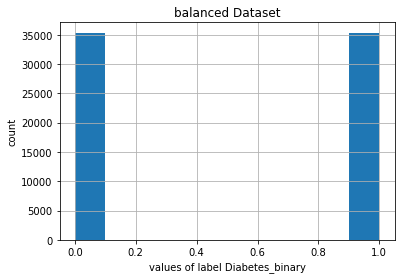

In [ ]:
histogram1=df['Diabetes_binary'].hist() #balanced target variable

fig = histogram1.get_figure()

pl.title("balanced Dataset")
pl.xlabel("values of label Diabetes_binary")
pl.ylabel("count")

fig.savefig('balanced 3.pdf')

In [ ]:
y=df['Diabetes_binary'].copy()
x=df.drop(['Diabetes_binary'],axis=1)
print(f'Distribution before imbalancing: {Counter(y)}')

print ('65% Imbalance \n' ) # number of 1's are 65% of the total lenght of column class 
X1, y1 = make_imbalance(x, y,
                              sampling_strategy={0: 19033, 1: 35346},
                              random_state=42)
print(f'Distribution after imbalancing: {Counter(y1)}')

print ('total number of rows now =', len(y1))

Distribution before imbalancing: Counter({0.0: 35346, 1.0: 35346})
65% Imbalance 

Distribution after imbalancing: Counter({1.0: 35346, 0.0: 19033})
total number of rows now = 54379


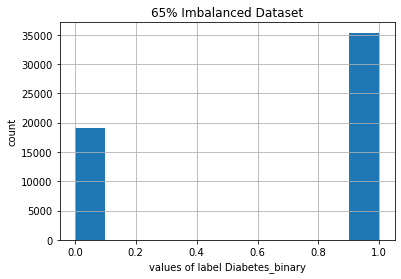

In [ ]:
histogram2=y1.hist() # 65% are 1's

fig = histogram2.get_figure()

pl.title("65% Imbalanced Dataset")
pl.xlabel("values of label Diabetes_binary")
pl.ylabel("count")

fig.savefig('Imbalanced3 65 perc.pdf')

In [ ]:
print(f'Distribution before imbalancing: {Counter(y)}')
print ('75% Imbalance \n' ) # number of 1's are 75% of the total lenght of column class 
X2, y2 = make_imbalance(x, y,
                              sampling_strategy={0: 11782, 1: 35346},
                              random_state=42)
print(f'Distribution after imbalancing: {Counter(y2)}')

print ('total number of rows now =', len(y2))

Distribution before imbalancing: Counter({0.0: 35346, 1.0: 35346})
75% Imbalance 

Distribution after imbalancing: Counter({1.0: 35346, 0.0: 11782})
total number of rows now = 47128


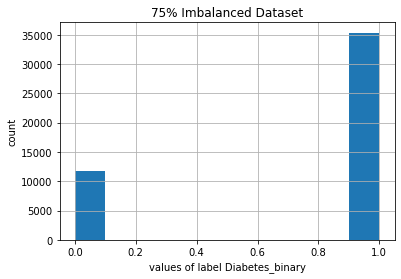

In [ ]:
histogram3=y2.hist() # 75% are 1's

fig = histogram3.get_figure()

pl.title("75% Imbalanced Dataset")
pl.xlabel("values of label Diabetes_binary")
pl.ylabel("count")

fig.savefig('Imbalanced3 75 perc.pdf')

In [ ]:
print(f'Distribution before imbalancing: {Counter(y)}')
print ('90% Imbalance \n' ) # number of 1's are 90% of the total lenght of column class 
X3, y3 = make_imbalance(x, y,
                              sampling_strategy={0: 3928, 1: 35346},
                              random_state=42)
print(f'Distribution after imbalancing: {Counter(y3)}')

print ('total number of rows now =', len(y3))

Distribution before imbalancing: Counter({0.0: 35346, 1.0: 35346})
90% Imbalance 

Distribution after imbalancing: Counter({1.0: 35346, 0.0: 3928})
total number of rows now = 39274


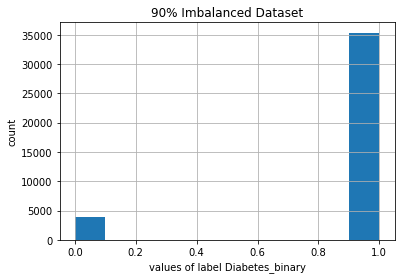

In [45]:
histogram4=y3.hist() # 90% are 1's

fig = histogram4.get_figure()

pl.title("90% Imbalanced Dataset")
pl.xlabel("values of label Diabetes_binary")
pl.ylabel("count")

fig.savefig('Imbalanced3 90 perc.pdf')